# Redshift Data of DESIJ0201-2739

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.stats import SigmaClip
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import (
    SourceCatalog,
    SourceFinder,
    deblend_sources,
    detect_sources,
)

In [3]:
data, header = fits.getdata("DESIJ0136-0008_F140W_drz_sci.fits", header=True)

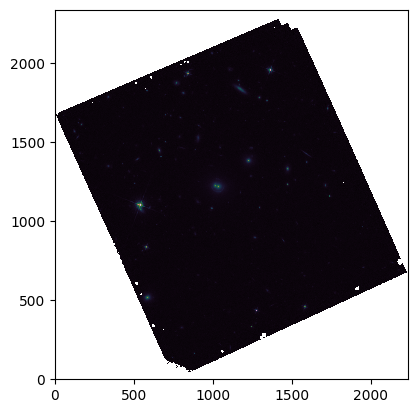

In [4]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [7]:
FILENAME = "legacy_DESIJ0136-0008" #need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.007646,8000331904000286,24.166244,0.131667,8000,331904,286,EXP,0.001,E5,0.927,0.145,1,1
1,0.007093,8000331904000287,24.166620,0.132560,8000,331904,287,REX,0.016,R5,0.731,0.245,1,1
2,0.007617,8000331904000288,24.167048,0.132224,8000,331904,288,PSF,0.045,P5,0.873,0.548,1,0
3,0.000636,8000331904000293,24.163136,0.138352,8000,331904,293,COMP,0.002,C9,0.340,0.035,1,1
4,0.003375,8000331904000295,24.163933,0.135277,8000,331904,295,REX,0.767,R4,0.267,0.075,1,1


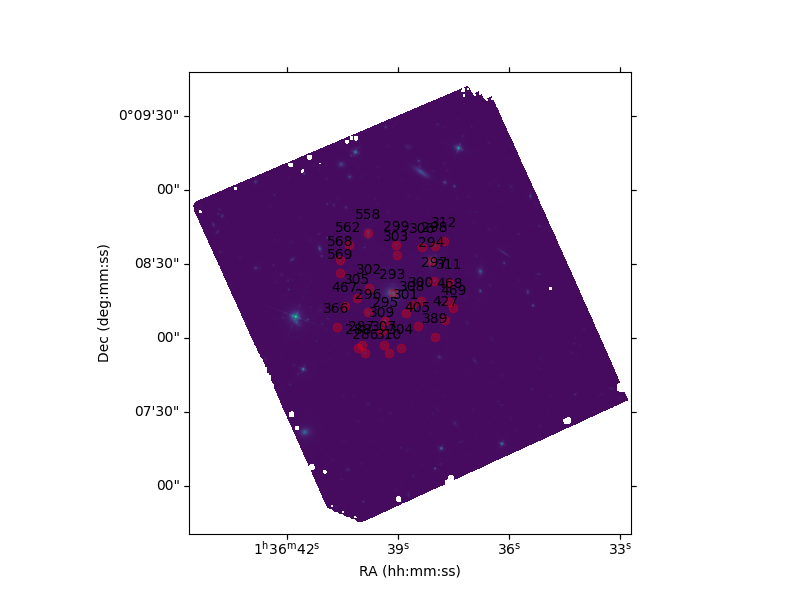

In [13]:
from astropy.visualization import wcsaxes, imshow_norm
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
#norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap='viridis')

x_scatter, y_scatter = wcs.all_world2pix(data_legacy['RAJ2000'], data_legacy['DEJ2000'], 0)

# Plot scatter points
ax.scatter(x_scatter, y_scatter, color='red', marker='o', label='J2000 RA/Dec', alpha=0.3)

#write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy['objid'][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(f'{obj_id}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels
ax.set_xlabel('RA (hh:mm:ss)')
ax.set_ylabel('Dec (deg:mm:ss)')

plt.show()

In [9]:
#In degrees
center_x, center_y = 24.1625000, 0.1383333 # RA 01:36:39 DEC -00:08:18
radii = 30 # in arcsec
radii_deg = radii/3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg 
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

681.8642902452575 1431.8620679085516


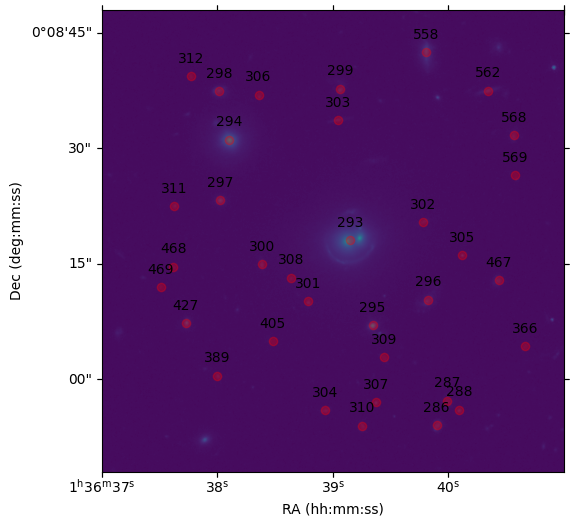

In [11]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
#norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap='viridis')

x_scatter, y_scatter = wcs.all_world2pix(data_legacy['RAJ2000'], data_legacy['DEJ2000'], 0)

# Plot scatter points
ax.scatter(x_scatter, y_scatter, color='red', marker='o', label='J2000 RA/Dec', alpha=0.3)

#write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy['objid'][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(f'{obj_id}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel('RA (hh:mm:ss)')
ax.set_ylabel('Dec (deg:mm:ss)')

In [12]:
data_legacy.sort_values(by="objid")

object_ids = [293, # central deflector
            300, 301, 302, 308]

columns_to_drop = ['id', 'RAJ2000', 'DEJ2000', 'release', 'brickid']  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[data_legacy_dropped['objid'].isin(object_ids)]
selected_data_legacy.set_index('objid', inplace=True)

print(selected_data_legacy)

             _r  type  pstar gmmcomp  zphot  e_zphot  fclean  fqual
objid                                                              
293    0.000636  COMP  0.002      C9  0.340    0.035       1      1
300    0.002707   EXP  0.002      E5  0.905    0.197       1      1
301    0.002361   REX  0.009      R5  1.020    0.537       0      0
302    0.003328   EXP  0.045      E1  0.586    0.148       0      0
308    0.002025   PSF  0.065      P0  0.615    0.630       0      0
